STEP 1: Identify and Collect Relevant Real-World Data

 #### Alzheimer's Disease Dataset

 #### Link -> https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data

 #### “Can we predict Alzheimer’s disease (Diagnosis) using patient health, lifestyle, and cognitive measurements?”
 

Step 2: Clean, Validate, and Transform Data for Analysis

In [11]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [12]:
df=pd.read_csv('alzheimers_disease_data.csv')

In [13]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [14]:
df.shape

(2149, 35)

In [15]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [17]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [20]:
numeric_cols

['PatientID',
 'Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diagnosis']

In [21]:
categorical_cols

['DoctorInCharge']

In [22]:
#no missing values so no need to run this code
num_imputer = SimpleImputer(strategy="median")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

In [23]:
drop_cols = ["PatientID", "DoctorInCharge"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [24]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73.0,0.0,0.0,2.0,22.927749,0.0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0.0,0.0,1.725883,0.0,0.0,0.0,1.0,0.0,0.0
1,89.0,0.0,0.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0.0
2,73.0,0.0,3.0,1.0,17.795882,0.0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0.0,0.0,7.119548,0.0,1.0,0.0,1.0,0.0,0.0
3,74.0,1.0,0.0,1.0,33.800817,1.0,12.209266,8.428001,7.435604,8.392554,...,8.965106,0.0,1.0,6.481226,0.0,0.0,0.0,0.0,0.0,0.0
4,89.0,0.0,0.0,0.0,20.716974,0.0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0.0


In [25]:
numeric_cols = [c for c in numeric_cols if c in df.columns]


In [26]:
def winsorize(col):
    lower = col.quantile(0.01)
    upper = col.quantile(0.99)
    return col.clip(lower, upper)

for col in numeric_cols:
    df[col] = winsorize(df[col])

In [27]:
df.shape

(2149, 33)

In [28]:
categorical_cols = ["Ethnicity", "EducationLevel"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)


In [29]:
df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Forgetfulness,Diagnosis,Ethnicity_0.0,Ethnicity_1.0,Ethnicity_2.0,Ethnicity_3.0,EducationLevel_0.0,EducationLevel_1.0,EducationLevel_2.0,EducationLevel_3.0
0,73.0,0.0,22.927749,0.0,13.297218,6.327112,1.347214,9.025679,0.0,0.0,...,0.0,0.0,True,False,False,False,False,False,True,False
1,89.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,7.151293,0.0,0.0,...,1.0,0.0,True,False,False,False,True,False,False,False
2,73.0,0.0,17.795882,0.0,19.555085,7.844988,1.826335,9.673574,1.0,0.0,...,0.0,0.0,False,False,False,True,False,True,False,False
3,74.0,1.0,33.800817,1.0,12.209266,8.428001,7.435604,8.392554,0.0,0.0,...,0.0,0.0,True,False,False,False,False,True,False,False
4,89.0,0.0,20.716974,0.0,18.454356,6.310461,0.795498,5.597238,0.0,0.0,...,0.0,0.0,True,False,False,False,True,False,False,False


In [30]:
df.shape

(2149, 39)

In [31]:
symptom_columns = [
    "MemoryComplaints",
    "BehavioralProblems",
    "Confusion",
    "Disorientation",
    "PersonalityChanges",
    "DifficultyCompletingTasks",
    "Forgetfulness"
]

df["Symptom_Count"] = df[symptom_columns].sum(axis=1)

In [32]:
df

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Diagnosis,Ethnicity_0.0,Ethnicity_1.0,Ethnicity_2.0,Ethnicity_3.0,EducationLevel_0.0,EducationLevel_1.0,EducationLevel_2.0,EducationLevel_3.0,Symptom_Count
0,73.0,0.0,22.927749,0.0,13.297218,6.327112,1.347214,9.025679,0.0,0.0,...,0.0,True,False,False,False,False,False,True,False,1.0
1,89.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,7.151293,0.0,0.0,...,0.0,True,False,False,False,True,False,False,False,1.0
2,73.0,0.0,17.795882,0.0,19.555085,7.844988,1.826335,9.673574,1.0,0.0,...,0.0,False,False,False,True,False,True,False,False,2.0
3,74.0,1.0,33.800817,1.0,12.209266,8.428001,7.435604,8.392554,0.0,0.0,...,0.0,True,False,False,False,False,True,False,False,1.0
4,89.0,0.0,20.716974,0.0,18.454356,6.310461,0.795498,5.597238,0.0,0.0,...,0.0,True,False,False,False,True,False,False,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61.0,0.0,39.121757,0.0,1.561126,4.049964,6.555306,7.535540,0.0,0.0,...,1.0,True,False,False,False,False,True,False,False,1.0
2145,75.0,0.0,17.857903,0.0,18.767261,1.360667,2.904662,8.555256,0.0,0.0,...,1.0,True,False,False,False,False,False,True,False,1.0
2146,77.0,0.0,15.476479,0.0,4.594670,9.886002,8.120025,5.769464,0.0,0.0,...,1.0,True,False,False,False,False,True,False,False,0.0
2147,78.0,1.0,15.299911,0.0,8.674505,6.354282,1.263427,8.322874,0.0,1.0,...,1.0,False,False,False,True,False,True,False,False,1.0


In [33]:
numeric_cols = [col for col in numeric_cols if col in df.columns]
numeric_cols

['Age',
 'Gender',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diagnosis']

step 3

In [34]:
df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Diagnosis,Ethnicity_0.0,Ethnicity_1.0,Ethnicity_2.0,Ethnicity_3.0,EducationLevel_0.0,EducationLevel_1.0,EducationLevel_2.0,EducationLevel_3.0,Symptom_Count
0,73.0,0.0,22.927749,0.0,13.297218,6.327112,1.347214,9.025679,0.0,0.0,...,0.0,True,False,False,False,False,False,True,False,1.0
1,89.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,7.151293,0.0,0.0,...,0.0,True,False,False,False,True,False,False,False,1.0
2,73.0,0.0,17.795882,0.0,19.555085,7.844988,1.826335,9.673574,1.0,0.0,...,0.0,False,False,False,True,False,True,False,False,2.0
3,74.0,1.0,33.800817,1.0,12.209266,8.428001,7.435604,8.392554,0.0,0.0,...,0.0,True,False,False,False,False,True,False,False,1.0
4,89.0,0.0,20.716974,0.0,18.454356,6.310461,0.795498,5.597238,0.0,0.0,...,0.0,True,False,False,False,True,False,False,False,2.0


In [60]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Correlation of all features with Diagnosis
diagnosis_corr = corr_matrix["Diagnosis"].sort_values(ascending=False)
print(diagnosis_corr)

Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
Symptom_Count                0.182135
CholesterolHDL               0.042509
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026355
CholesterolTriglycerides     0.022682
DifficultyCompletingTasks    0.009069
DietQuality                  0.008454
CholesterolTotal             0.006347
PhysicalActivity             0.005967
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007738
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gender                      -0.020975
HeadInjury                  -0.021411
Disorientation              -0.024648
Diabetes                    -0.031508
CholesterolL

In [36]:
X = df[
    [
        "Age", "Gender", "BMI", "Smoking", "AlcoholConsumption", "PhysicalActivity",
        "DietQuality", "SleepQuality", "FamilyHistoryAlzheimers", "CardiovascularDisease",
        "Diabetes", "Depression", "Hypertension",
        "MemoryComplaints", "BehavioralProblems", "Confusion", "Disorientation",
        "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness",
        "Symptom_Count", "ADL", "FunctionalAssessment", "MMSE",
        "Ethnicity_0.0", "Ethnicity_1.0", "Ethnicity_2.0", "Ethnicity_3.0",
        "EducationLevel_0.0", "EducationLevel_1.0", "EducationLevel_2.0", "EducationLevel_3.0"
    ]
].copy()

y = df["Diagnosis"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

step 4

In [38]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

RidgeClassifier()

In [40]:
y_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8209302325581396
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       278
         1.0       0.75      0.74      0.74       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



In [41]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("Linear Regression")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("-"*50)


Linear Regression
Train R2: 0.3128967502013359
Test R2: 0.21644263536539154
Train MSE: 0.15706806282722513
Test MSE: 0.17906976744186046
--------------------------------------------------


In [42]:
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print("Ridge Regression")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("-"*50)

Ridge Regression
Train R2: 0.32562088445686677
Test R2: 0.2367947747065502
Train MSE: 0.15415939499709133
Test MSE: 0.1744186046511628
--------------------------------------------------


In [43]:
dt = DecisionTreeRegressor(max_depth=None, random_state=42)  # start with full depth
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print("Decision Tree Regressor")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Decision Tree Regressor
Train R2: 1.0
Test R2: 0.4810204468004542
Train MSE: 0.0
Test MSE: 0.1186046511627907


In [44]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("-"*50)


Lasso Regression
Train R2: 0.43142780193336294
Test R2: 0.4023324770878589
Train MSE: 0.12997250959577353
Test MSE: 0.13658755461425323
--------------------------------------------------


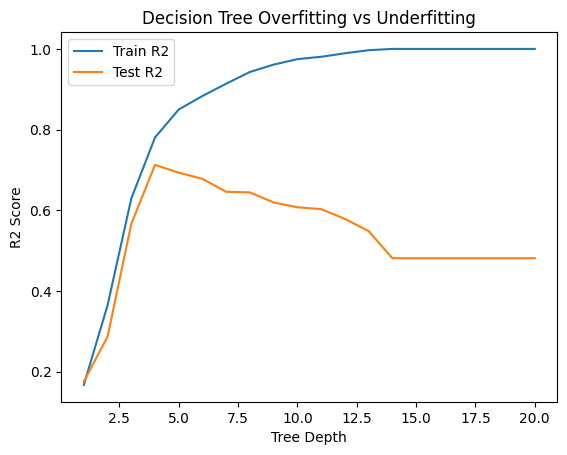

In [45]:
train_scores = []
test_scores = []
depths = range(1, 21)

for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(r2_score(y_train, dt.predict(X_train)))
    test_scores.append(r2_score(y_test, dt.predict(X_test)))

import matplotlib.pyplot as plt

plt.plot(depths, train_scores, label="Train R2")
plt.plot(depths, test_scores, label="Test R2")
plt.xlabel("Tree Depth")
plt.ylabel("R2 Score")
plt.title("Decision Tree Overfitting vs Underfitting")
plt.legend()
plt.show()


In [46]:

results = {}

lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = {
    "Train R2": r2_score(y_train, lr.predict(X_train)),
    "Test R2": r2_score(y_test, lr.predict(X_test)),
    "Train MSE": mean_squared_error(y_train, lr.predict(X_train)),
    "Test MSE": mean_squared_error(y_test, lr.predict(X_test))
}

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
results["Ridge Regression"] = {
    "Train R2": r2_score(y_train, ridge.predict(X_train)),
    "Test R2": r2_score(y_test, ridge.predict(X_test)),
    "Train MSE": mean_squared_error(y_train, ridge.predict(X_train)),
    "Test MSE": mean_squared_error(y_test, ridge.predict(X_test))
}


lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
results["Lasso Regression"] = {
    "Train R2": r2_score(y_train, lasso.predict(X_train)),
    "Test R2": r2_score(y_test, lasso.predict(X_test)),
    "Train MSE": mean_squared_error(y_train, lasso.predict(X_train)),
    "Test MSE": mean_squared_error(y_test, lasso.predict(X_test))
}


dt = DecisionTreeRegressor(max_depth=None, random_state=42)
dt.fit(X_train, y_train)
results["Decision Tree"] = {
    "Train R2": r2_score(y_train, dt.predict(X_train)),
    "Test R2": r2_score(y_test, dt.predict(X_test)),
    "Train MSE": mean_squared_error(y_train, dt.predict(X_train)),
    "Test MSE": mean_squared_error(y_test, dt.predict(X_test))
}

comparison_df = pd.DataFrame(results).T  
comparison_df


,Train R2,Test R2,Train MSE,Test MSE
Linear Regression,0.443283,0.390986,0.127262,0.139181
Ridge Regression,0.443281,0.391270,0.127263,0.139116
Lasso Regression,0.431428,0.402332,0.129973,0.136588
Decision Tree,1.000000,0.481020,0.000000,0.118605


step 5


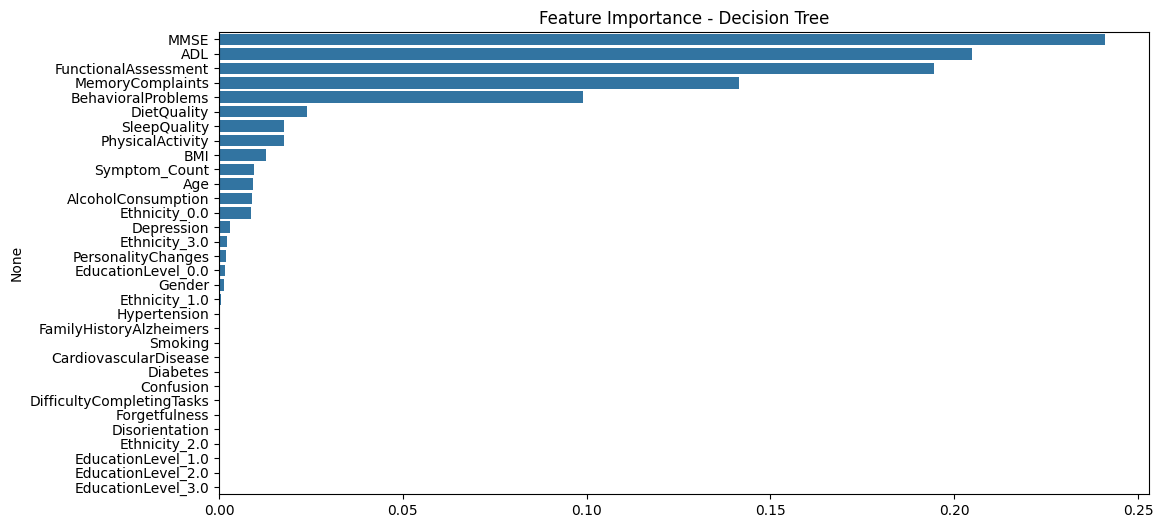

In [47]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

# Feature importance
feat_importance = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importance - Decision Tree")
plt.show()

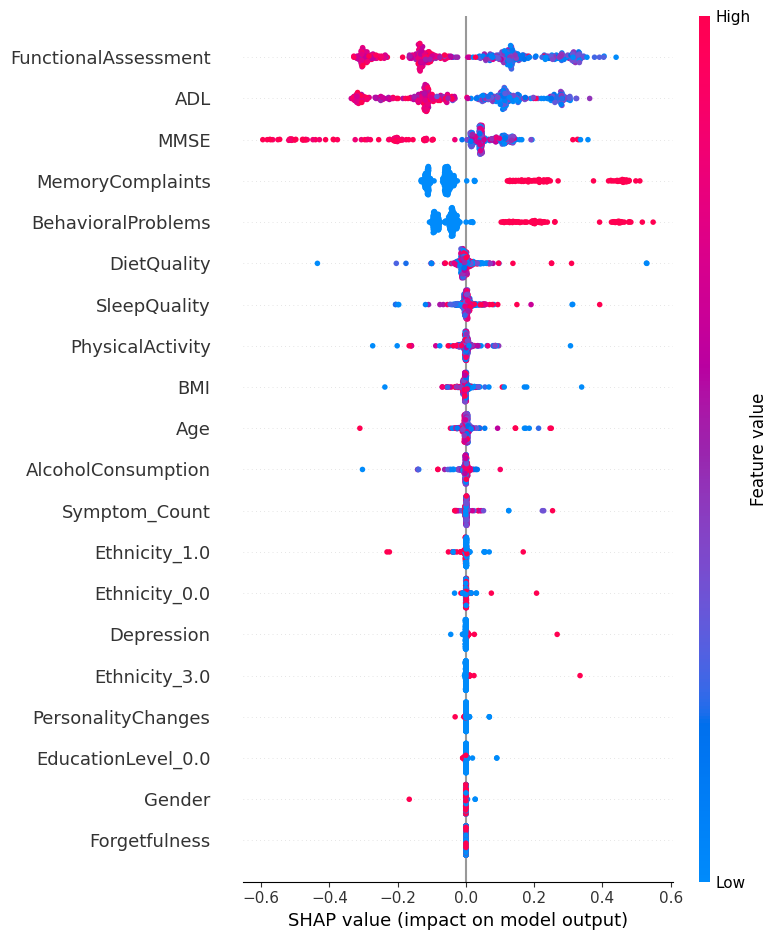

In [48]:
explainer = shap.TreeExplainer(dt)

# Compute SHAP values
shap_values = explainer(X_test)  # notice no shap_values() method

# For binary classification, use .values[:, :, 1] or .values
shap.summary_plot(shap_values.values[:, :, 1], X_test)

Accuracy: 0.8813953488372093
Precision: 0.8098159509202454
Recall: 0.868421052631579
F1-score: 0.8380952380952381


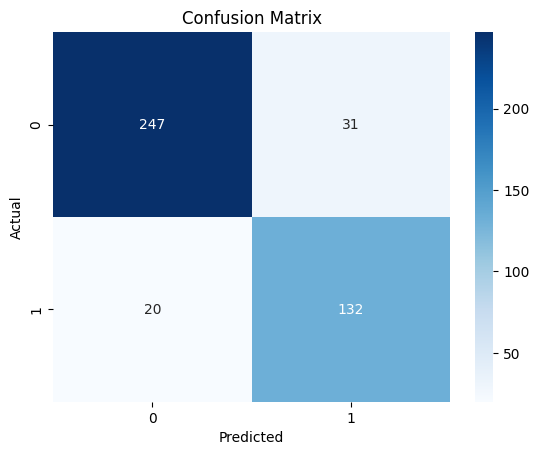

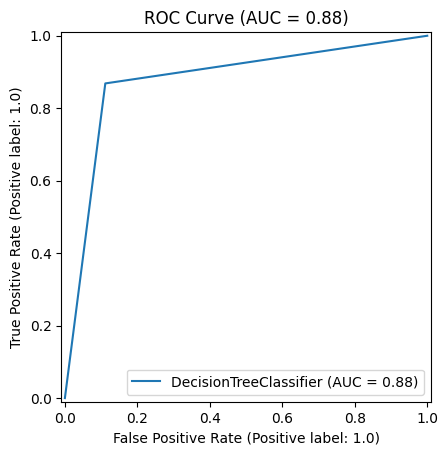

In [49]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_test, y_prob)
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")
plt.show()

step 6

In [50]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]


In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [52]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8813953488372093
Precision: 0.8098159509202454
Recall: 0.868421052631579
F1-score: 0.8380952380952381


step 7

In [53]:
importances = dt.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))



Top 10 Important Features:
                 Feature  Importance
23                  MMSE    0.240963
21                   ADL    0.204819
22  FunctionalAssessment    0.194465
13      MemoryComplaints    0.141484
14    BehavioralProblems    0.098925
6            DietQuality    0.023996
7           SleepQuality    0.017696
5       PhysicalActivity    0.017616
2                    BMI    0.012726
20         Symptom_Count    0.009388


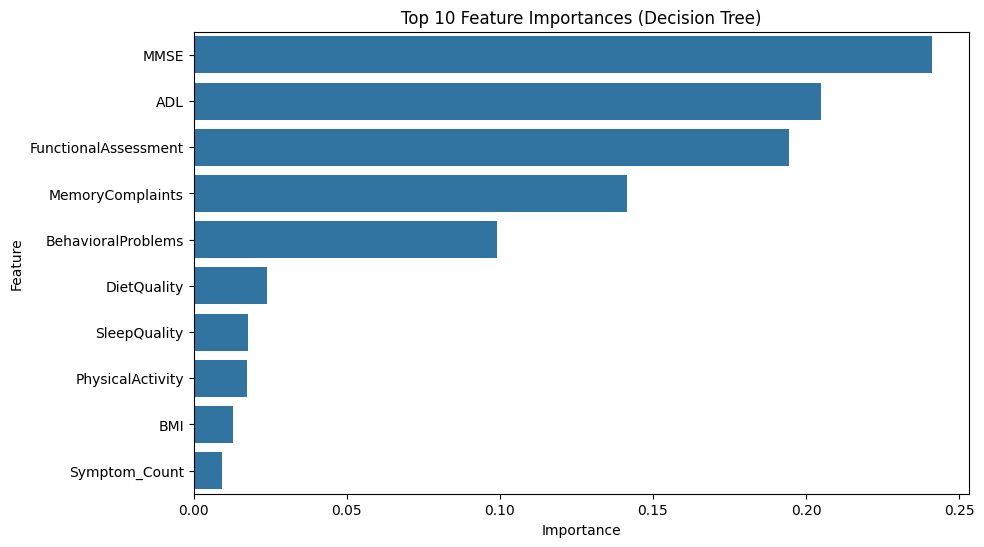

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.show()

In [55]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})
print("\nModel Performance Metrics:")
print(metrics_df)


Model Performance Metrics:
      Metric     Value
0   Accuracy  0.881395
1  Precision  0.809816
2     Recall  0.868421
3   F1-score  0.838095
4    ROC-AUC  0.878455


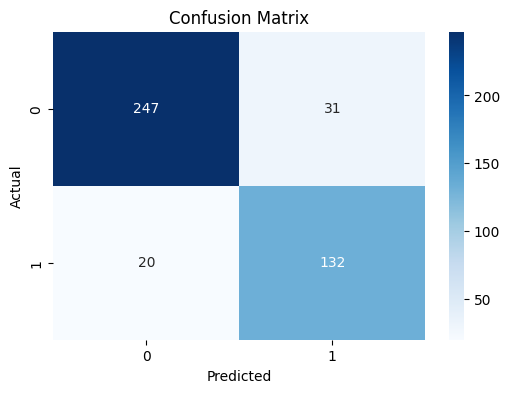

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

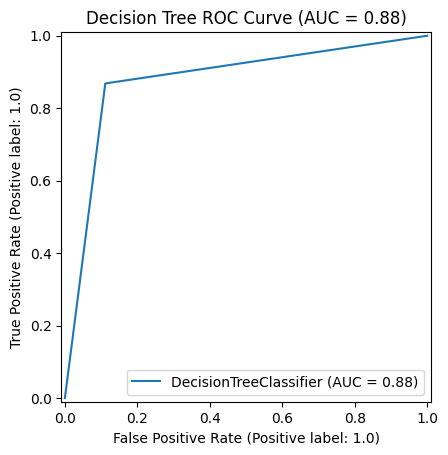

In [57]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title(f'Decision Tree ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

In [58]:
import joblib

# Save the trained model
joblib.dump(dt, 'alzheimers_decision_tree_model.pkl')
print("Model saved as 'alzheimers_decision_tree_model.pkl'")

# load the model
# loaded_model = joblib.load('alzheimers_decision_tree_model.pkl')
# y_pred = loaded_model.predict(X_new)


Model saved as 'alzheimers_decision_tree_model.pkl'
